In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn
import pylab

In [2]:
lib1_round1 = pd.read_csv('../data/SMLib1_naive_to_round1_enrich.csv')
lib1_round2 = pd.read_csv('../data/SMLib1_round1_to_round2_enrich.csv')
lib1_round3 = pd.read_csv('../data/SMLib1_round2_to_round3_enrich.csv')

productive_lib1_round1 = lib1_round1[np.logical_and(lib1_round1.forward_insertion, lib1_round1.in_frame)]
productive_lib1_round2 = lib1_round2[np.logical_and(lib1_round2.forward_insertion, lib1_round2.in_frame)]
productive_lib1_round3 = lib1_round3[np.logical_and(lib1_round3.forward_insertion, lib1_round3.in_frame)]

pos_prod_lib1_round1 = productive_lib1_round1[productive_lib1_round1.log2FoldChange > 0]
pos_prod_lib1_round2 = productive_lib1_round2[productive_lib1_round2.log2FoldChange > 0]
pos_prod_lib1_round3 = productive_lib1_round3[productive_lib1_round3.log2FoldChange > 0]


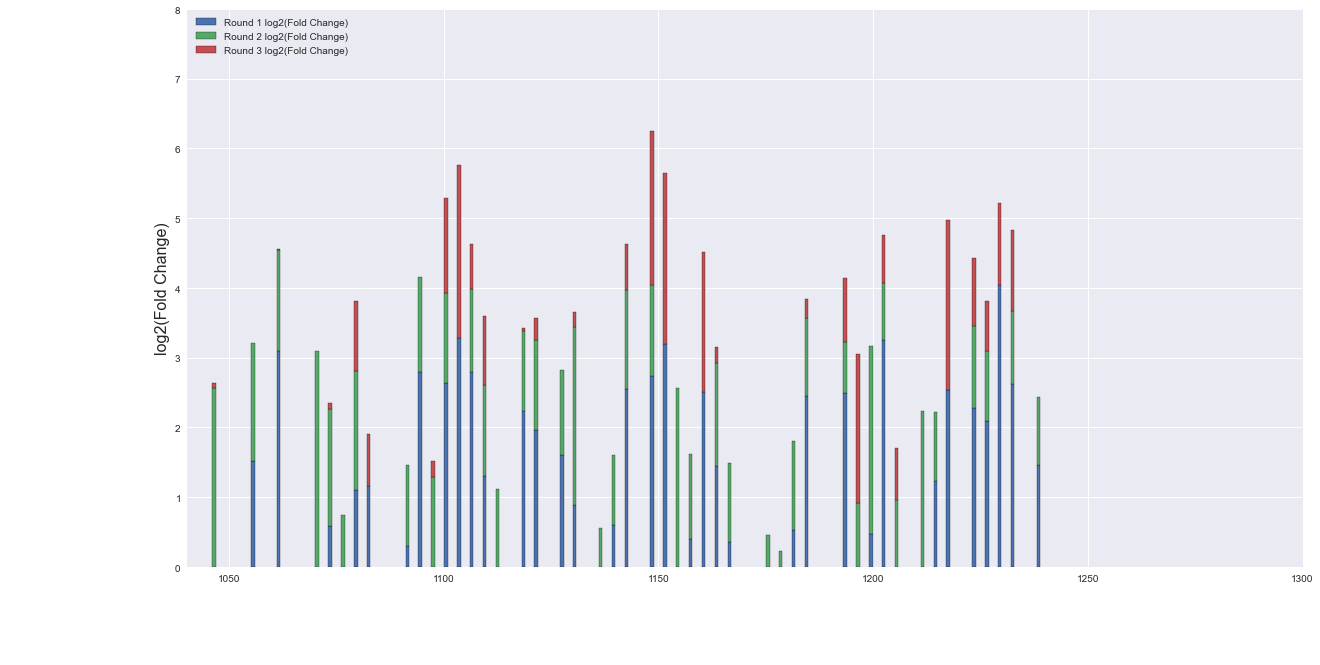

In [3]:
pylab.figure(figsize=(20,10))

pallete = seaborn.SEABORN_PALETTES['deep']

pylab.bar(pos_prod_lib1_round1.insertion_site.values.tolist(),
          pos_prod_lib1_round1.log2FoldChange.values.tolist(),
          color=pallete[0],
          label='Round 1 log2(Fold Change)')

# Update bottom
bottom = np.zeros(1300)
for site in xrange(1300):
    posn = pos_prod_lib1_round1.insertion_site == site
    fcdata = pos_prod_lib1_round1[posn]
    fc = 0
    if fcdata.size:
        fc = fcdata.log2FoldChange.values[0]
    bottom[site] = fc
    
pylab.bar(pos_prod_lib1_round2.insertion_site,
          pos_prod_lib1_round2.log2FoldChange,
          bottom=bottom[pos_prod_lib1_round2.insertion_site],
          color=pallete[1],
          label='Round 2 log2(Fold Change)')

# Update bottom
for site in xrange(1300):
    posn = pos_prod_lib1_round2.insertion_site == site
    fcdata = pos_prod_lib1_round2[posn]
    fc = 0
    if fcdata.size:
        fc = fcdata.log2FoldChange.values[0]
    bottom[site] += fc

pylab.bar(pos_prod_lib1_round3.insertion_site,
          pos_prod_lib1_round3.log2FoldChange,
          bottom=bottom[pos_prod_lib1_round3.insertion_site],
          color=pallete[2],
          label='Round 3 log2(Fold Change)')
pylab.legend(loc=2)
pylab.ylabel('log2(Fold Change)', fontsize=16)

for i in xrange(0, 1300, 260):
    pylab.xlim(i, i + 260)
    pylab.savefig('TMBP_positive_fc_%d_%d.png' % (i, i + 260))
